# Probability

As mentioned in the book's roadmap, probability ideas must be developed to understand inferential statistics. Probability is a vital subject with many applications in Medicine, Biology, Genetics, Engineering, Business, Economics, etc. This chapter introduces basic concepts and additional techniques like probability simulations and applications of Bayes Theorem.

In [4]:
from IPython.display import Markdown
base_path = (
    "https://raw.githubusercontent.com/rezahabibi96/GitBook/refs/heads/main/"
    "books/applied-statistics-with-python/.resources"
)

In [ ]:
import math
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, binom

import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import figure

import requests
from io import BytesIO

## Basic Concepts of Probability

**Probability** deals with **random processes** giving rise to outcomes that cannot be predicted in advance. The simplest examples of such processes are flipping a coin or rolling a die, but random processes apply to far more complex situations like fluctuations in the stock market, genetic mutations, etc.

Let's begin the discussion of probability with a **sample space**, which is the set of all possible outcomes of an experiment. Any subset of the sample space is an **event**. A simple event consists of exactly one element of the sample space. For example, the sample space for tossing two coins is $S = {HH, HT, TH, TT}$. Any of the above outcomes would be a simple event. A more general event would be, say, tossing one head and one tail $A = {HT, TH}$. For equally likely outcomes, the probability could be defined simply as a ratio of the number of outcomes in the event of interest to the total number of simple events in the sample space. Then, the probability of one head and one tail is $P(A) = 2/4 = 1/2$.

More generally, we use a frequentist approach where the probability of an outcome is the proportion of times the outcome would occur if the process is observed an *infinite number of times*. Let's consider a simulation of a large, but of course finite number of repetitions of tossing a fair coin. Let $\hat{p}_n$ be the proportion of heads in the first $n$ coin tosses. The figure below shows two sequences of fair coin tosses. Initially, they are very different, but as the number of tosses increases, $\hat{p}_n$ eventually converges to the theoretical probability $p = 1/2$. Note that after just a few tosses, or even 10 or 20, the proportion still fluctuates a lot; only in a long run of many thousands of tosses does $\hat{p}_n$ stabilize around the true theoretical probability. It is a common misconception that if you flip a fair coin 10 or 20 times, the proportion of heads should be close to half, but that is only achieved in the long run (large numbers). For the same reason, if red came out a few times in a row at a casino table, it is *not* more likely for black to appear—they only equilibrate in the long run!

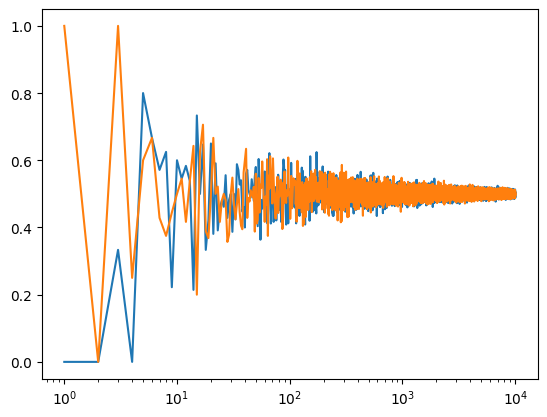

In [ ]:
def coinFlip(size):
    flips = np.random.randint(0, 2, size=size)
    return flips.mean()

coinFlip = np.frompyfunc(coinFlip, 1, 1)

x = np.arange(1, 10000, 1)
y1 = coinFlip(x)
y2 = coinFlip(x)

fig, ax = plt.subplots()
ax.plot(x, y1); ax.plot(x, y2);
ax.set_xscale('log');

## Addition Rule

The events are **disjoint (mutually exclusive)** if there are no elements in common. Venn diagrams help to understand disjoint vs. non-disjoint events (sets) as shown in the Figure below:

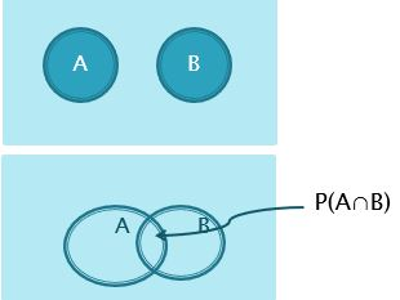

In [ ]:
url = f'{base_path}/VennDiagram1.JPG'
page = requests.get(url)
img = Image.open(BytesIO(page.content))
img.resize((400, 300))

For example, rolling an odd number on a die (${1,3,5}$) is disjoint from rolling an even number (${2,4,6}$). However, rolling a number less than 3 (${1,2}$) and rolling an even number (${2,4,6}$) are not disjoint because they share ${2}$ (intersection is ${2}$).

Given two **disjoint** events $A_1$ and $A_2$, the probability that one occurs or the other is given by the **addition rule**:

$$P(A_1 \text{ or } A_2) = P(A_1) + P(A_2)$$

For example, the probability of picking a queen or a king out of a standard deck of cards is:

$$P(Q \text{ or } K) = P(Q) + P(K) = \frac{4}{52} + \frac{4}{52} = \frac{8}{52} \approx 0.154$$

Consider now a non-disjoint case. For example, let event $K$ be randomly selecting a king from a shuffled card deck ($P(K) = 4/52$) and event $R$ be randomly selecting a red card from a deck ($P(R) = 26/52$). $K$ and $R$ are not disjoint (King of Hearts and King of Diamonds are in the intersection). If probabilities are simply added, the King of Hearts and King of Diamonds are double-counted ($P(K \text{ and } R) = 2/52$), so it should be subtracted:

$$P(K \text{ or } R) = P(K) + P(R) - P(K \text{ and } R) = \frac{4}{52} + \frac{26}{52} - \frac{2}{52} = \frac{28}{52}$$

Thus, we obtain the **General Addition Rule**:

Given two events $A_1$ and $A_2$ (disjoint or not):

$$P(A_1 \text{ or } A_2) = P(A_1) + P(A_2) - P(A_1 \text{ and } A_2)$$

In the case they are disjoint, $P(A_1 \text{ and } A_2) = 0$ and we have the simple addition rule.

Here is another example relevant to college students. Assume 10% of students major in accounting ($A$), 15% major in business ($B$), and 3% are double majors (both $A$ and $B$). What is the probability that a randomly chosen student is an accounting or a business major? The events are clearly not mutually exclusive because of double majors, so

$$P(A \text{ or } B) = P(A) + P(B) - P(A \text{ and } B) = 0.10 + 0.15 - 0.03 = 0.22$$

## Simple Finite Probability Distribution

For the case of a simple finite sample space consisting of a fixed number of outcomes, a probability distribution is just a table of all possible outcomes and their associated probabilities. For example, for a fair coin, it is just:
| x | Head (H) | Tail (T) |
|---|----------|----------|
| p | 0.5      | 0.5      |


The coin need not be fair, so an equally valid probability distribution might be:
| x | Head (H) | Tail (T) |
|---|----------|----------|
| p | 0.6      | 0.4      |


Analogously, a fair die distribution would be given by:
| x | 1   | 2   | 3   | 4   | 5   | 6   |
|---|-----|-----|-----|-----|-----|-----|
| p | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |


A fair die and coin are examples of a **uniform** distribution where all outcomes are equally likely; an unfair coin is not.

The sum of outcomes while rolling two fair dice provides a very interesting example of non-uniform distribution. Possible sums are given by:
|   | 1 | 2 | 3 | 4 | 5 | 6 |
|---|---|---|---|---|---|---|
| 1 | 2 | 3 | 4 | 5 | 6 | 7 |
| 2 | 3 | 4 | 5 | 6 | 7 | 8 |
| 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| 5 | 6 | 7 | 8 | 9 | 10 | 11 |
| 6 | 7 | 8 | 9 | 10 | 11 | 12 |

The probabilities are obtained by counting how many ways to get a particular sum out of all possible $6 \cdot 6 = 36$ equally likely combinations:

     x         p
0    2  0.027778
1    3  0.055556
2    4  0.083333
3    5  0.111111
4    6  0.138889
5    7  0.166667
6    8  0.138889
7    9  0.111111
8   10  0.083333
9   11  0.055556
10  12  0.027778


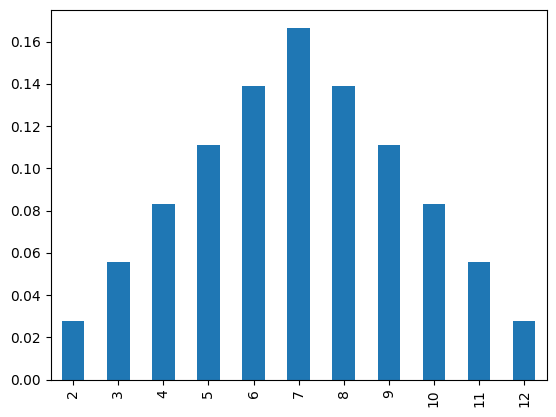

In [ ]:
x = np.arange(start=2,stop=13,step=1)
p = np.array([1,2,3,4,5,6,5,4,3,2,1])/36

df = pd.DataFrame({'x':x, 'p':p})
print(df)

df.index = ["2","3","4","5","6","7","8","9","10","11","12"]
df['p'].plot(kind='bar');

To be valid, a probability distribution must satisfy these three properties:
1. All finite outcomes must be disjoint.
2. All probabilities are between 0 and 1.
3. The probabilities add up to 1.

Another interesting finite discrete distribution is Benford's law: the distribution of the leading (first) digit in many real datasets is not uniform, but rather heavily skewed right. As the Figure below shows, 1 appears as the leading significant digit about 30% of the time, 2 $17.6%$, …, 9 less than $5%$ of the time. Financial data follows this law quite well, so the IRS flags tax returns failing to follow this law as a possible fraud.

   x         p
1  1  0.301030
2  2  0.176091
3  3  0.124939
4  4  0.096910
5  5  0.079181
6  6  0.066947
7  7  0.057992
8  8  0.051153
9  9  0.045757


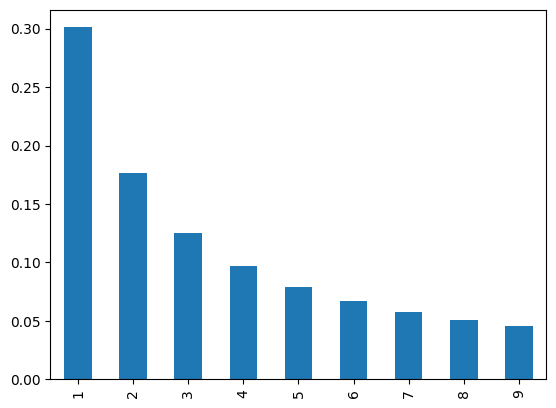

In [ ]:
x = np.arange(start=1,stop=10,step=1)
p = np.log(1+1/x)/np.log(10)

df = pd.DataFrame({'x':x, 'p':p})
df.index = ["1","2","3","4","5","6","7","8","9"]

print(df)
df['p'].plot(kind='bar');

## Complement of an Event

A **complement** of an event $A$ (denoted by $A^c$) consists of all outcomes in the sample space that are not in $A$. For example, let the event $A$ be rolling any of the 1 through 4: $A = {1,2,3,4}$, then $A^c = {5,6}$. Note that $P(A) = 4/6$ and $P(A^c) = 2/6$, which add up to 1. Based on the definition above, $A$ and $A^c$ cover the entire sample space and are clearly disjoint, so:

$$1 = P(S) = P(A \text{ or } A^c) = P(A) + P(A^c) \Rightarrow P(A) = 1 - P(A^c)$$

This simple algebraic formula is surprisingly useful for many complex probability questions. It is often hard or impossible to find the probability of the event, but the probability of the complement can be found and subtracted from 1 to answer the original question.

For rolling two dice, say, what is the probability that the sum is 9 or less? One can count directly, but the complement rule is more efficient:

$$P(\text{sum} \le 9) = 1 - P(\text{sum} \ge 10) = 1 - 6/36 = 30/36 = 5/6$$

There are more applications of the complement rule in future sections, but first independence must be discussed.

## Independence

Random processes or events are **independent** if the occurrence of one event does not affect the occurrence of the other. Sometimes it is obvious—one die roll does not affect another, and one coin flip does not affect another. Other times it requires research; for example, it has been shown that eye color is independent of gender, but it was not obvious to start with. On the other hand, it is well known by insurance companies that age and rate of accidents are not independent. Younger, less experienced, and more reckless drivers get into accidents more often and, as a result, are charged higher insurance premiums. Stock prices day to day are not independent of each other, but the nature of this dependence is still a mystery.

The **Multiplication Rule for Independent Events (Processes)** $A$ and $B$ states that the probability of both events happening is the product of the probabilities of each event happening individually:

$$P(A \text{ and } B) = P(A) \cdot P(B)$$

For example, about 27% of the US population has blue eyes. Suppose two people are selected at random independently from each other. The probability that both have blue eyes is:

$$P(B \text{ and } B) = P(B) \cdot P(B) = 0.27 \cdot 0.27 = 0.0729$$

The probability that at least one of the two randomly chosen people has blue eyes is best found using the complement rule:

$$P(\text{at least one blue eyes}) = 1 - P(\text{none}) = 1 - P(\text{both not blue}) = 1 - 0.73 \cdot 0.73 = 0.4671$$

In the case of only two people, the probability of at least one blue-eyed person could have been computed directly, as there are only four total options ${BB, BN, NB, NN}$, of which three have at least one blue-eyed person (still you would have to compute three products and add them). If we have three people, there are $2^3 = 8$ total options ${BBB, BBN, BNB, BNN, NBB, NBN, NNB, NNN}$, and there are seven combinations in which at least one person has blue eyes. The complement is much easier to compute.

$$P(\text{at least one blue eyes}) = 1 - P(\text{none}) = 1 - P(NNN) = 1 - 0.73^3 = 0.61098$$

Finally, for a larger number of people, for example 10, using the complement is the only option:

$$P(\text{at least one blue eyes}) = 1 - P(\text{none}) = 1 - 0.73^{10} = 0.9570$$

We will return to the questions of this type in the next chapter when we study the Binomial distribution.

Independence can also be used in the classic problem of redundant alarm clocks. Assume a student has a very important exam and sets two independent alarm clocks. Each clock has a probability of working $0.99$ (fails to work $1 - 0.99 = 0.01$). Then

$$P(\text{at least one works}) = 1 - P(\text{both fail}) = 1 - 0.01 \cdot 0.01 = 0.9999$$

Thus, the chance that at least one works and a student wakes up is much higher.

Note that the multiplication rule is often used as a definition of independence, so it can be used to establish independence. For example, consider picking two cards out of a well-shuffled deck at random. The probability that they are red kings is:

$$P(\text{Red and Kings}) = 2/52$$

Consider also

$$P(\text{Red}) \cdot P(\text{Kings}) = \frac{26}{52} \cdot \frac{4}{52} = \frac{104}{52 \cdot 52} = \frac{2}{52}$$

These probabilities are the same, so picking red cards and picking kings at random is independent, which was not obvious.

Note also that we should not confuse independent events and disjoint events. Compare the above with computations we have done before for the probability of picking a king **OR** a red card (Addition Rule):

$$P(K \text{ or } R) = P(K) + P(R) - P(K \text{ and } R) = \frac{4}{52} + \frac{26}{52} - \frac{2}{52} = \frac{28}{52} = \frac{7}{13}$$

The probability $P(K \text{ and } R) = \frac{2}{52} \ne 0$, so these events are not disjoint, but they are independent. It is a common misconception that mutual exclusiveness (disjoint events) and independence are the same. On the contrary, for any nontrivial disjoint events $A$ and $B$, independence cannot even hold:

$$P(A \text{ and } B) = 0 \ne P(A) \cdot P(B)$$

since $P(A)$ and $P(B)$ are not 0.

*Birthday Problem*

This is a classical problem in probability that illustrates ideas of complement and independence. Suppose that $k$ people are selected at random from the general population. What are the chances that at least two of those $k$ were born on the same day?

“At least two” gives way too many options, but the complement (none) is much easier to track:

$$P(\text{at least two same bday}) = 1 - P(\text{none}) = 1 - \frac{365}{365} \cdot \frac{364}{365} \cdot \frac{363}{365} \cdots \frac{365 - k + 1}{365}$$

To compute it for general $k$, we need a program that iteratively multiplies the probabilities for 1st person to choose a day, 2nd person to choose a day not the same as the 1st, etc. The iterative computation is necessary since computing powers of 365 quickly exceed the highest number that a computer can store.

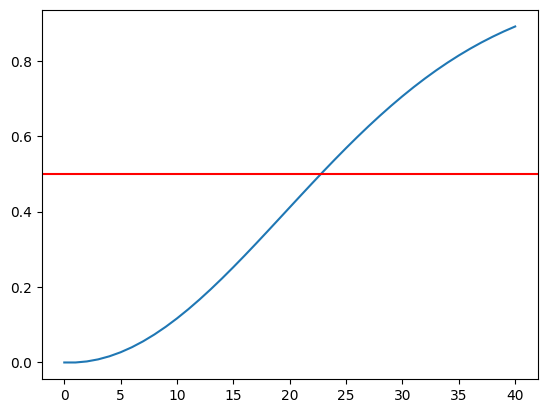

In [ ]:
kmax=40;
kv=np.arange(0,kmax+1)
pv=np.repeat(1.0,kmax+1)

for j in range(2, kmax+1):
    pv[j ]=pv[j-1]*(365-j+1)/365

pv=1-pv #complement
df=pd.DataFrame({'class_size':kv, 'probability':pv})

plt.plot(kv, pv);
plt.axhline(y=0.5, color='r', linestyle='-');

The Figure above shows that the probabilities greatly exceed what our intuition would suggest. It is more than a 50% chance for a class of 23 already, and by 40, it is almost 90%.

## Conditional Probability

Sometimes, we know that a certain event has already occurred and it may have a bearing on the probability we are trying to find — **conditional probability**.

For instance, consider rolling a fair die and the event of rolling 3 or less: $A = {1,2,3}$. The sample space is ${1,2,\dots,6}$, and they are all equally likely, so $P(A) = \frac{3}{6} = \frac{1}{2}$.

But suppose someone watched the die roll and tells you, not the exact outcome, but that an odd number appeared. Denote it as the event $B = {1,3,5}$. This changes the sample space to a smaller *conditional sample space* $B = {1,3,5}$, still equally likely. Therefore, the updated **conditional probability** is $P(A|B) = \frac{2}{3}$.

Note that

$$P(A|B) = \frac{2}{3} = \frac{\frac{2}{6}}{\frac{3}{6}} = \frac{P(A \text{ and } B)}{P(B)}$$

The equation

$$P(A|B) = \frac{P(A \text{ and } B)}{P(B)}$$

is actually used as **the definition of conditional probability**.

As a more practical example, a car insurance company will consider information about a person's driving history (conditioned on past history) to assess the probability of an accident.

Conditional probability is also involved in the computations of sampling with and without replacement. If a person/item cannot be picked more than once, it is sampling **without replacement**. Conversely, if a person or item is put back, it is sampling **with replacement**.

For example, what is the probability of picking an Ace first and a Queen second vs. the probability of picking two Aces?

First, without replacement:

$$P(\text{Ace first and Queen second}) = \frac{4}{52} \cdot \frac{4}{51}$$

$$P(\text{Ace first and Ace second}) = \frac{4}{52} \cdot \frac{3}{51}$$

Second, with replacement:

$$P(\text{Ace first and Queen second}) = \frac{4}{52} \cdot \frac{4}{52} = \left(\frac{4}{52}\right)^2$$

$$P(\text{Ace first and Ace second}) = \frac{4}{52} \cdot \frac{4}{52} = \left(\frac{4}{52}\right)^2$$

Note that in sampling without replacement, the 2nd probability is conditional, while in sampling with replacement, all probabilities are independent and actually the same.

## Contingency Tables Probability

Conditional probability is very useful in the context of contingency tables.

**Example**

Consider a marketing study on social class and purchasing habits for two brands A and B. The code below to display data frame with margins is a bit technical.

|         | Lower | Middle | Upper | Sum |
| ------- | ----- | ------ | ----- | --- |
| Brand A | 2     | 22     | 21    | 45  |
| Brand B | 24    | 3      | 24    | 51  |
| Sum     | 26    | 25     | 45    | 96  |


In [ ]:
O = pd.DataFrame({'Lower':[2,24], 'Middle':[22,28], 'Upper':[21,3]},
                 index=['Brand A','Brand B'])

print(O)

Om = pd.DataFrame.copy(O) # creating data frame with margins
Om['Sum'] = O.sum(axis=1)
c = O.sum(axis=0);
Om.loc[len(Om.index)] = c.tolist() + [O.sum().sum()]

print(Om)

         Lower  Middle  Upper
Brand A      2      22     21
Brand B     24      28      3
         Lower  Middle  Upper  Sum
Brand A      2      22     21   45
Brand B     24      28      3   55
2           26      50     24  100


We already encountered in the previous chapter contingency tables based on data. Here, we are given counts in each contingency pair directly. In this example, there are, say, 2 in the Lower class who insist on buying more expensive Brand A, and 28 in the Middle class who are ok with a less fancy Brand B. The row and column totals are given. The total number of people who preferred Brand A is $2+22+21=45$, regardless of social class, and the total number of the middle class is $22+28=50$. The grand total is 100. Every entry divided by the grand total gives overall probabilities. For example:

$$P(\text{Brand B and Lower})=\frac{24}{100}=0.24$$
$$P(\text{Brand A and Middle})=\frac{22}{100}=0.22$$

The probabilities above are **joint probabilities** connecting events with **and**. On the other hand, **marginal probabilities** are row and column total probabilities for each variable separately:

$$P(\text{Brand B})=\frac{55}{100}=0.55$$
$$P(\text{Lower})=\frac{26}{100}=0.26$$

However, **row and column (conditional) probabilities** are more informative.

First, row probabilities:
$$P(\text{Lower | Brand A})=\frac{2}{45}=0.0444$$
$$P(\text{Middle | Brand A})=\frac{22}{45}=0.489$$

Column probabilities:
$$P(\text{Brand A | Lower})=\frac{2}{26}=0.0769$$
$$P(\text{Brand A | Middle})=\frac{22}{50}=0.44$$

Note above that switching the order of conditioning produces different probabilities $P(\text{Lower|Brand A}) \ne P(\text{Brand A|Lower})$. A ratio of probabilities formula can also be used to find any of the conditional probabilities. For example:

$$P(\text{Brand B|Upper})=\frac{3}{24}=\frac{3}{100}\ /\ \frac{24}{100}=\frac{P(\text{Brand B and Upper})}{P(\text{Upper})}=0.125$$

The answer is the same, but it is more work. However, it is needed when the full contingency table is not given.

The main question in a contingency table is whether row and column variables depend on each other. Let's compare conditional and marginal probabilities:

$$P(\text{Brand A|Lower})=\frac{2}{26}=0.077$$
$$P(\text{Brand A|Middle})=\frac{22}{50}=0.44$$
$$P(\text{Brand A|Upper})=\frac{21}{24}=0.875$$
$$P(\text{Brand A})=\frac{45}{100}=0.45$$

These probabilities are very different, so the row variable (Brand) is dependent on the column variable (Social Class). What if they were close, but not exactly the same? The chi-squared test in chapter 6 will answer how close is close enough for independence.

Let's also check if the joint probability is the product of marginal ones:

$$P(\text{Brand A and Lower}) ?= P(\text{Brand A}) \cdot P(\text{Lower})$$
$$\frac{2}{100} ?= \frac{45}{100} \cdot \frac{26}{100} \Rightarrow 0.02 ?= 0.45 \cdot 0.26=0.117$$

No it is not, so that proves dependence in another way.

Finally, let's illustrate the Addition Rule for a contingency table.

$$P(\text{Brand A or Upper})=P(\text{Brand A})+P(\text{Upper})-P(\text{Brand A and Upper})=\frac{45}{100}+\frac{24}{100}-\frac{21}{100}=\frac{48}{100}$$

**Example**

Let's now consider a similar problem on a two-by-two contingency table on Dove soap usage by gender. Such tables are very common and calling entries a, b, c, d, we can set up the table and answer any probability questions in terms of ratios, which is done in the Python code below:

|         | Male    | Female  | Sum          |
| ------- | ------- | ------- | ------------ |
| DoveYes | a=80    | b=120   | a+b=200      |
| DoveNo  | c=320   | d=480   | c+d=800      |
| Sum     | a+c=400 | b+d=600 | a+b+c+d=1000 |


In [41]:
a = 80; b = 120;
c = 320; d = 480;

Om=np.matrix([[a, b , a+b],
              [c, d , c+d],
              [a+c, b+d, a+b+c+d ]])

Om=pd.DataFrame(Om,
                columns=['Male','Female','Sum'],
                index=['DoveYes','DoveNo','Sum'])

Om

,Male,Female,Sum
DoveYes,80,120,200
DoveNo,320,480,800
Sum,400,600,1000


In [16]:
JointMarginal = Om.div(a+b+c+d)
JointMarginal

,Male,Female,Sum
DoveYes,0.08,0.12,0.2
DoveNo,0.32,0.48,0.8
Sum,0.40,0.60,1.0


In [17]:
print('P(Male | DoveYes) = a/(a+b): ', a/(a+b))
print('P(Female | DoveNo) = d/(c+d): ', d/(c+d))
print('P(DoveYes | Male) = a/(a+c): ', a/(a+c))
print('P(DoveNo | Female) = d/(b+d): ', d/(b+d))

print('\nDependence check')
print('Two conditional probabilities and the marginal:')
print('P(DoveYes | Male) = a/(a+c): ', a/(a+c))
print('P(DoveYes | Female) = b/(b+d): ', b/(b+d))
print('P(DoveYes) = (a+b)/(a+b+c+d): ', (a+b)/(a+b+c+d))

print('\nJoin probability vs. product of marginal ones')
print('P(DoveYes and Male) = a/(a+b+c+d): ', a/(a+b+c+d))
print('P(DoveYes)=(a+b)/(a+b+c+d): ', (a+b)/(a+b+c+d))
print('P(Male)=(a+c)/(a+b+c+d): ', (a+c)/(a+b+c+d))
print('P(DoveYes) * P(Male) = (a+b)/(a+b+c+d)*(a+c)/(a+b+c+d): ', 
      (a+b)/(a+b+c+d)*(a+c)/(a+b+c+d))

P(Male | DoveYes) = a/(a+b):  0.4
P(Female | DoveNo) = d/(c+d):  0.6
P(DoveYes | Male) = a/(a+c):  0.2
P(DoveNo | Female) = d/(b+d):  0.8

Dependence check
Two conditional probabilities and the marginal:
P(DoveYes | Male) = a/(a+c):  0.2
P(DoveYes | Female) = b/(b+d):  0.2
P(DoveYes) = (a+b)/(a+b+c+d):  0.2

Join probability vs. product of marginal ones
P(DoveYes and Male) = a/(a+b+c+d):  0.08
P(DoveYes)=(a+b)/(a+b+c+d):  0.2
P(Male)=(a+c)/(a+b+c+d):  0.4
P(DoveYes) * P(Male) = (a+b)/(a+b+c+d)*(a+c)/(a+b+c+d):  0.08


The dependence check shows that the gender and Dove soap usage are independent of each other.
We can also illustrate the Addition Rule. For example:
$$P(DoveYes \text{ or } Male) = P(DoveYes)+P(Male)-P(DoveYes \text{ and } Male)$$

In [18]:
print('P(DoveYes or Male) = (a+b)/(a+b+c+d) + (a+c)/(a+b+c+d)- a/(a+b+c+d) :',
      (a+b)/(a+b+c+d),' + ',(a+c)/(a+b+c+d),'- ',a/(a+b+c+d),' = ',
      np.round((a+b)/(a+b+c+d) + (a+c)/(a+b+c+d)- a/(a+b+c+d),2) )

P(DoveYes or Male) = (a+b)/(a+b+c+d) + (a+c)/(a+b+c+d)- a/(a+b+c+d) : 0.2  +  0.4 -  0.08  =  0.52


**Example**

In the next problem, we consider a similar two-by-two contingency table of a new scan technique to check for muscle tear against the gold standard (it could be a standard scan or surgery). In addition, we introduce standard terminology for these types of problems.
|                | Has Tear (Condition) | No Tear (No Condition) | Sum             |
|----------------|-----------------------|------------------------|-----------------|
| Test Positive  | a=47 (True Positive)  | b=5 (False Positive)   | a+b=52 (Total Positive) |
| Test Negative  | c=2 (False Negative)  | d=46 (True Negative)   | c+d=48 (Total Negative) |
| Sum            | a+c=49 (Total Condition) | b+d=51 (Total No Condition) | a+b+c+d=100 (Grand Total) |

The gold standard (truth) is in the columns and new test results are in the rows, although it does not matter—just be consistent. The table shows standard terminology. The patients who have the condition and tested positive are called **True Positive**, and those who tested negative are called **False Negative**. The patients who don't have the condition and tested positive are called **False Positive**, and those who tested negative are called **True Negative**. The row totals give the total number of positive and negative tests, while column totals give the total number of patients with and without the condition. There is also the grand total in the lower right corner. First, the code below sets up the contingency table, and the overall probabilities are computed by dividing each entry by the grand total of 100.

In [ ]:
a = 47; # true positive
b = 5; #false positive
c = 2; #false negative
d = 46; # true negative

Om = np.matrix( [[a, b, a+b],
                 [c, d, c+d],
                 [a+c, b+d, a+b+c+d]])

Om = pd.DataFrame(Om,
                  columns=['Had Tear','No Tear','Sum'],
                  index=['Test Positive','Test Negative','Sum'])

Om

,Had Tear,No Tear,Sum
Test Positive,47,5,52
Test Negative,2,46,48
Sum,49,51,100


In [20]:
JointMarginal = Om.div(a+b+c+d)
JointMarginal

,Had Tear,No Tear,Sum
Test Positive,0.47,0.05,0.52
Test Negative,0.02,0.46,0.48
Sum,0.49,0.51,1.00


This gives the following *joint* probabilities:

$$P(\text{has tear and test positive}) = 47/100 = 0.47$$
$$P(\text{has tear and test negative}) = 2/100 = 0.02$$
$$P(\text{no tear and test positive}) = 5/100 = 0.05$$
$$P(\text{no tear and test negative}) = 46/100 = 0.46$$

The *marginal* probabilities:

$$P(\text{has tear}) = 49/100 = 0.49$$
$$P(\text{no tear}) = 51/100 = 0.51$$
$$P(\text{test positive}) = 52/100 = 0.52$$
$$P(\text{test negative}) = 48/100 = 0.48$$

Next, we set row probabilities with new test terminology. First, **positive predictive value** is the probability that a person who tests positive indeed has a condition $P(\text{has tear | test positive})$.

In [21]:
print('\nPos Predict Value = a/(a+b) = ', a, '/', a+b, ' = ', a/(a+b))


Pos Predict Value = a/(a+b) =  47 / 52  =  0.9038461538461539


The high positive predictive values close to 100% are important for a useful test. A value close to 50/50 indicates a useless (uninformative) test.

Similarly, **negative predictive value** is the probability that the person who tests negative indeed has no condition $P(\text{no tear | test negative})$.

In [22]:
print('Neg Predict Value = d/(c+d) = ', d, '/', c+d, ' = ', d/(c+d))

Neg Predict Value = d/(c+d) =  46 / 48  =  0.9583333333333334


Now consider column proportions.

The **sensitivity** (true positive rate) is the probability that the person who has a condition tests positive $P(\text{test positive | has tear})$.

In [23]:
print('Sensitivity = a/(a+c) = ', a, '/', a+c, ' = ', a/(a+c))

Sensitivity = a/(a+c) =  47 / 49  =  0.9591836734693877


The **specificity** (true negative rate) is the probability that the person who has no condition tests negative $P(\text{test negative | no tear})$.

In [24]:
print('Specificity = d/(b+d) = ', d, '/', b+d, ' = ', d/(b+d))

Specificity = d/(b+d) =  46 / 51  =  0.9019607843137255


Finally, the overall accuracy of the test is defined as the proportion correct results:

In [27]:
print('P(Correct Test) = (a+d)/(a+b+c+d) = (',a,'+',d,')/', a+b+c+d, ' = ', (a+d)/(a+b+c+d))

P(Correct Test) = (a+d)/(a+b+c+d) = ( 47 + 46 )/ 100  =  0.93


We can summarize all Python steps above into a single function.

In [42]:
def ProbabilityTable22(a,b,c,d,rnames,cnames):
    Om = np.matrix( [[a, b, a+b],
                     [c, d, c+d],
                     [a+c, b+d, a+b+c+d]])
    Om = pd.DataFrame(Om,
                      columns=[cnames[0],cnames[1],'Sum'],
                      index =[rnames[0],rnames[1],'Sum'])
    print(Om, '\n')

    JointMarginal = round(Om.div(a+b+c+d),4)
    print('Joint and Marginal Probabilities: \n\n',JointMarginal)

    print('\nPos Predict Value = P({:s}|{:s}) = a/(a+b) = {:d}/{:d} = {:.4f}'
          .format(cnames[0],rnames[0],a,a+b,a/(a+b)))
    print('\nNeg Predict Value = P({:s}|{:s}) = d/(c+d) = {:d}/{:d} = {:.4f}'
          .format(cnames[1],rnames[1],d,c+d,d/(c+d)))
    print('\nSensitivity = P({:s}|{:s}) = a/(a+c) = {:d}/{:d} = {:.4f}'
          .format(rnames[0],cnames[0],a,a+c,a/(a+c)))
    print('\nSpecificity = P({:s}|{:s}) = d/(b+d) = {:d}/{:d} = {:.4f}'
          .format(rnames[1],cnames[1],d,b+d,d/(b+d)))
    print('\nP(Correct Test) = (a+d)/(a+b+c+d) = {:d}/{:d} = {:.4f}'
          .format(a+d,a+b+c+d,(a+d)/(a+b+c+d)))

ProbabilityTable22(a=47, b=5, c=2, d=46, rnames=['Test Positive','Test Negative'],
                   cnames=['Had Tear','No Tear'])

               Had Tear  No Tear  Sum
Test Positive        47        5   52
Test Negative         2       46   48
Sum                  49       51  100 

Joint and Marginal Probabilities: 

                Had Tear  No Tear   Sum
Test Positive      0.47     0.05  0.52
Test Negative      0.02     0.46  0.48
Sum                0.49     0.51  1.00

Pos Predict Value = P(Had Tear|Test Positive) = a/(a+b) = 47/52 = 0.9038

Neg Predict Value = P(No Tear|Test Negative) = d/(c+d) = 46/48 = 0.9583

Sensitivity = P(Test Positive|Had Tear) = a/(a+c) = 47/49 = 0.9592

Specificity = P(Test Negative|No Tear) = d/(b+d) = 46/51 = 0.9020

P(Correct Test) = (a+d)/(a+b+c+d) = 93/100 = 0.9300


**Example**

In the previous problem on the new scan for muscle tear diagnostics, the number of patients with and without the muscle tear was about the same. Sometimes, however, we are testing for a rare condition/infection. For example, for the infection disease data below, we apply the same function to compute all the probabilities.

|                | Has Infection            | No Infection              | Sum                           |
|----------------|-------------------------|---------------------------|-------------------------------|
| Test Positive  | a=90 (True Positive)    | b=625 (False Positive)    | a+b=715 (Total Positive)      |
| Test Negative  | c=10 (False Negative)   | d=2575 (True Negative)    | c+d=2585 (Total Negative)     |
| Sum            | a+c=100 (Total Condition) | b+d=3200 (Total No Condition) | a+b+c+d=3300 (Grand Total) |


In [29]:
ProbabilityTable22(a=90, b=625, c=10, d=2575, rnames=['Test Positive','Test Negative'], cnames=['Has Infection','No Infection'])

               Has Infection  No Infection   Sum
Test Positive             90           625   715
Test Negative             10          2575  2585
Sum                      100          3200  3300 

Joint and Marginal Probabilities: 

                Has Infection  No Infection     Sum
Test Positive         0.0273        0.1894  0.2167
Test Negative         0.0030        0.7803  0.7833
Sum                   0.0303        0.9697  1.0000

Pos Predict Value = P(Has Infection|Test Positive) = a/(a+b) = 90/715 = 0.1259

Neg Predict Value = P(No Infection|Test Negative) = d/(c+d) = 2575/2585 = 0.9961

Sensitivity = P(Test Positive|Has Infection) = a/(a+c) = 90/100 = 0.9000

Specificity = P(Test Negative|No Infection) = d/(b+d) = 2575/3200 = 0.8047

P(Correct Test) = (a+d)/(a+b+c+d) = 2665/3300 = 0.8076


The Specificity and Sensitivity are quite high, but the Positive Predictive Value is very low. It does not necessarily invalidate the test, rather the infection has a low **prevalence**- the proportion of the population with the condition is only about 3% here. Retesting for positive cases might be in order or, if possible, focusing on subgroups of the population with a higher occurrence of the condition.

**Example**

Here is another practical application. A rm introduces a new lie detector test and advertises it to the Police, FBI, etc. Here are the results of the test run on 100 people divided about equally between actors who lied and who did not lie.

In [30]:
ProbabilityTable22(a=44, b=16, c=8, d=32, rnames=['Test Positive','Test Negative'], cnames=['Lied','Not Lied'])

               Lied  Not Lied  Sum
Test Positive    44        16   60
Test Negative     8        32   40
Sum              52        48  100 

Joint and Marginal Probabilities: 

                Lied  Not Lied  Sum
Test Positive  0.44      0.16  0.6
Test Negative  0.08      0.32  0.4
Sum            0.52      0.48  1.0

Pos Predict Value = P(Lied|Test Positive) = a/(a+b) = 44/60 = 0.7333

Neg Predict Value = P(Not Lied|Test Negative) = d/(c+d) = 32/40 = 0.8000

Sensitivity = P(Test Positive|Lied) = a/(a+c) = 44/52 = 0.8462

Specificity = P(Test Negative|Not Lied) = d/(b+d) = 32/48 = 0.6667

P(Correct Test) = (a+d)/(a+b+c+d) = 76/100 = 0.7600


Overall, it is not very impressive, but you have to compare it to the competition.

## General Multiplication Rule and Tree Diagrams

The definition of conditional probability given before

$$P(A|B) = \frac{P(A \text{ and } B)}{P(B)}$$

can be used to trivially solve for the joint probability $P(A \text{ and } B)$ to obtain the **General Multiplication Rule**:

$$P(A \text{ and } B) = P(A|B) \cdot P(B) = P(B) \cdot P(A|B)$$

For independent events, the conditional probability is the same as the original probability $P(A|B) = P(A)$, so we get independent events Multiplication Rule again $P(A \text{ and } B) = P(A) \cdot P(B)$.

It would be redundant, but the general multiplication rule can be illustrated for the muscle tear example:
| Has Tear      | No Tear                  | Sum                         |                           |
| ------------- | ------------------------ | --------------------------- | ------------------------- |
| Test Positive | a=47 (True Positive)     | b=5 (False Positive)        | a+b=52 (Total Positive)   |
| Test Negative | c=2 (False Negative)     | d=46 (True Negative)        | c+d=48 (Total Negative)   |
| Sum           | a+c=49 (Total Condition) | b+d=51 (Total No Condition) | a+b+c+d=100 (Grand Total) |

$$P(\text{test positive and has tear}) = P(\text{has tear}) \cdot P(\text{test positive}|\text{has tear})$$

$$\frac{a}{a+b+c+d} = \frac{a+c}{a+b+c+d} \cdot \frac{a}{a+c}$$

$$\frac{47}{100} = \frac{49}{100} \cdot \frac{47}{49}$$

$$0.47 = 0.49 \cdot 0.959$$


**Tree diagrams** help to organize outcomes and their probabilities according to the conditional structure of the data. They are most useful when processes occur in a sequence and each process is conditioned on its predecessors. Let's first represent an infectious disease example as a tree. First, let's remind ourselves of the set-up below.

| Has Infection | No Infection              | Sum                           |                            |
| ------------- | ------------------------- | ----------------------------- | -------------------------- |
| Test Positive | a=90 (True Positive)      | b=625 (False Positive)        | a+b=715 (Total Positive)   |
| Test Negative | c=10 (False Negative)     | d=2575 (True Negative)        | c+d=2585 (Total Negative)  |
| Sum           | a+c=100 (Total Condition) | b+d=3200 (Total No Condition) | a+b+c+d=3300 (Grand Total) |


In reality, we usually don't have a full contingency table, but rather we know the overall incidence of the disease:

$$P(\text{has infection}) = \frac{a+c}{a+b+c+d} = \frac{100}{3300} = 0.0303$$

As well as manufacturer-provided Sensitivity and Specificity:

$$Sensitivity = P(\text{test positive}|\text{has infection}) = \frac{90}{100}$$
$$Specificity = P(\text{test negative}|\text{no infection}) = \frac{2575}{3200} = 0.8047$$

Based on the above information only, the probability tree below can be constructed:

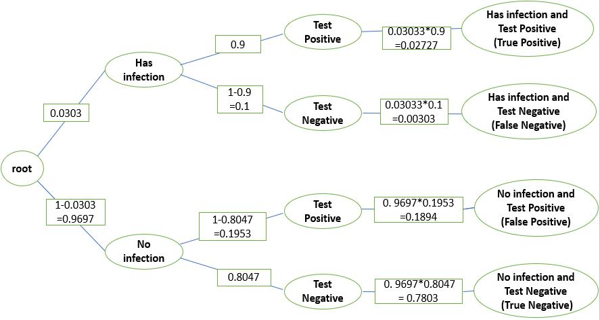

In [ ]:
url = f'{base_path}/TreeInfect1.JPG'
page = requests.get(url)
img = Image.open(BytesIO(page.content))
img.resize((600, 320))

A tree starts with a root. The next level gives the marginal probabilities of having an infection or not (add up to 1). The next column gives conditional probabilities of testing positive or negative given the previous branch of infection (use given sensitivity and specificity and the complement law). Finally, the last column lists joint probabilities as products of marginal and conditional:

$$P(\text{has infection and test positive}) = P(\text{has infection}) \cdot P(\text{test positive}|\text{has infection}) = 0.0303 \cdot 0.9 = 0.02727$$

$$P(\text{has infection and test negative}) = P(\text{has infection}) \cdot P(\text{test negative}|\text{has infection}) = 0.0303 \cdot 0.1 = 0.00303$$

$$P(\text{no infection and test positive}) = P(\text{no infection}) \cdot P(\text{test positive}|\text{no infection}) = 0.9697 \cdot 0.19531 = 0.18939$$

$$P(\text{no infection and test negative}) = P(\text{no infection}) \cdot P(\text{test negative}|\text{no infection}) = 0.9697 \cdot 0.80469 = 0.7803$$

Comparing it to the original table of joint and marginal probabilities, we see that we get the same answers.

More importantly, a probability tree can be used to find the reversed conditional probability $P(\text{has infection}|\text{tested positive})$ — Positive Predictive Value — and $P(\text{no infection}|\text{tested negative})$ — Negative Predictive Value.

The **Bayes Theorem** switches the conditioning:

$$P(\text{has infection}|\text{tested positive}) = \frac{P(\text{has infection and tested positive})}{P(\text{tested positive})}$$

$$= \frac{P(\text{infect}) \cdot P(\text{test pos}|\text{infect})}{P(\text{infect}) \cdot P(\text{test pos}|\text{infect}) + P(\text{no infect}) \cdot P(\text{test pos}|\text{no infect})}$$

Following the tree above, we obtain Positive Predictive Value:

$$P(\text{has infection}|\text{tested positive}) = \frac{0.0303 \cdot 0.9}{0.0303 \cdot 0.9 + 0.9697 \cdot 0.19531} = 0.12587$$

Negative Predictive Value:

$$P(\text{no infection}|\text{tested negative}) = \frac{0.9697 \cdot 0.80469}{0.9697 \cdot 0.80469 + 0.0303 \cdot 0.1} = 0.99613$$

These are exactly the conditional probabilities we obtained before.

**Example**

Let's consider a more realistic infectious disease problem where the contingency table is not given. Assume a manufacturer produced a new test for infectious disease with a prevalence of 0.05 ($P(\text{randomly selected person has the disease}) = 0.05$). Also, the manufacturer claims that their test has Sensitivity $= P(\text{test positive}|\text{has infection}) = 0.91$ and Specificity $= P(\text{test negative}|\text{no infection}) = 0.84$. Note that this formulation works for any new test, scan, or device; for example, we can assess the effectiveness of a new alarm system, lie detector test, etc. Note that another way to give conditional probabilities would be to say that the false negative rate is 9%, and the false positive rate is 16%. Based on this information we can create the following tree shown in the Figure below:

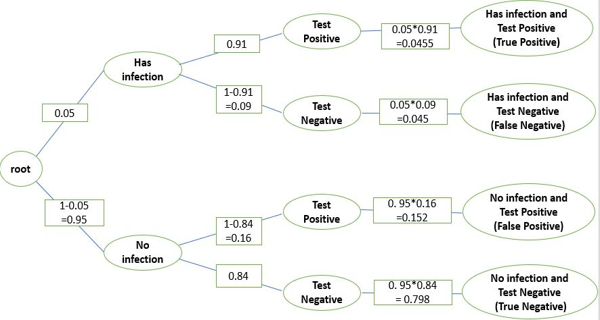

In [ ]:
url = f'{base_path}/TreeInfect2.JPG'
page = requests.get(url)
img = Image.open(BytesIO(page.content))
img.resize((600, 320))

The Bayes Theorem gives us:

$$P(\text{has infection}|\text{tested positive}) = \frac{P(\text{has infection and tested positive})}{P(\text{tested positive})}$$

$$= \frac{P(\text{infect}) \cdot P(\text{test pos}|\text{infect})}{P(\text{infect}) \cdot P(\text{test pos}|\text{infect}) + P(\text{no infect}) \cdot P(\text{test pos}|\text{no infect})}$$

Following the tree, we obtain for Positive Predictive Value:

$$P(\text{has infection}|\text{tested positive}) = \frac{0.05 \cdot 0.91}{0.05 \cdot 0.91 + 0.95 \cdot 0.16} = 0.23038$$

Analogously for the Negative Predictive Value:

$$P(\text{no infection}|\text{tested negative}) = \frac{0.95 \cdot 0.84}{0.95 \cdot 0.84 + 0.05 \cdot 0.09} = 0.99439$$

The Positive Predictive Value is low again due to low prevalence.

**Example**

Conditional trees and Bayes Theorem have many applications. In this example, a business application for quality control is investigated. Assume a computer manufacturer buys computer chips from firms A, B, and C with supply shares and defective percentages given in the table below. If a computer was returned with a defective chip, how likely is it that it came from each of the firms?
| Firm | Supply % | Defective % |
| ---- | -------- | ----------- |
| A    | 30       | 4           |
| B    | 50       | 3           |
| C    | 20       | 5           |

Based on the supply percentages, the main branches of the probability tree below are created and the defective percentages are conditional probabilities for each supplier.


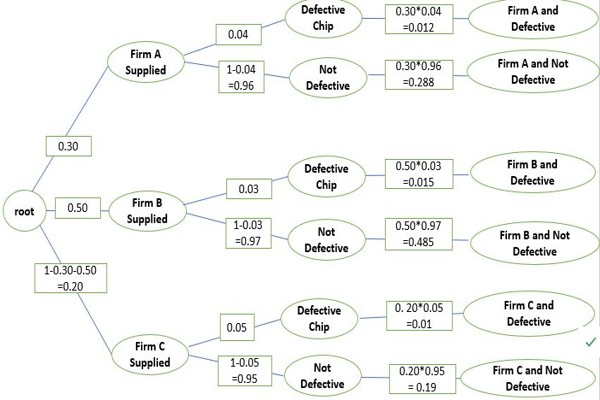

In [ ]:
url = f'{base_path}/TreeFirmChips.JPG'
page = requests.get(url)
img = Image.open(BytesIO(page.content))
img.resize((600, 400))

The Bayes Theorem gives us:

$$P(\text{Firm A|defective}) = \frac{P(\text{Firm A and defective})}{P(\text{defective})}$$

$$= \frac{P(A)\cdot P(\text{defective|A})}{P(A)\cdot P(\text{defective|A}) + P(B)\cdot P(\text{defective|B}) + P(C)\cdot P(\text{defective|C})}$$

Following the tree we obtain:

$$P(\text{Firm A|defective}) = \frac{0.30\cdot 0.04}{0.30\cdot 0.04 + 0.50\cdot 0.03 + 0.20\cdot 0.05} = 0.3243$$

Analogously for Firm B and Firm C:

$$P(\text{Firm B|defective}) = \frac{0.50\cdot 0.03}{0.30\cdot 0.04 + 0.50\cdot 0.03 + 0.20\cdot 0.05} = 0.4054$$

$$P(\text{Firm C|defective}) = \frac{0.20\cdot 0.05}{0.30\cdot 0.04 + 0.50\cdot 0.03 + 0.20\cdot 0.05} = 0.2703$$

It is perhaps somewhat surprising that given a defective chip, it is most likely coming from Firm B even though they have a smaller percentage of defectives. However, they supply most chips by far, 50%, compared to 30% and 20% by the two other firms.

##  Expected Value of Probability Distribution

**Example**

Consider an example of placing a bet of $10 on a single number in a casino roulette, say 27, but it does not matter which one. There are 38 equally likely slots on a roulette. Most likely you are going to lose your bet with probability $37/38$. In an unlikely event of winning with the probability $1/38$, the net gain is $350. Therefore the probability distribution is:
| Payout      | -10   | 350  |
| ----------- | ----- | ---- |
| Probability | 37/38 | 1/38 |


Let's assume you bet 100 times. You would expect to win on average $\$350 \cdot 100 \cdot 1/38 = \$921.05$ and lose $\$10 \cdot 100 \cdot 37/38 = \$973.68$ for the net expected gain of $-\$52.63$. Per game, this amounts to $-\$52.63/100 = -\$0.53$ dollars loss per game.

Note that you cannot lose this amount in a single game, most of the time you lose your $10 bets and occasionally win $350. However, over 100 games, on average, you expect to lose this amount per game. Note that this amount does not depend on the number of bets you place:

$$\frac{\$350 \cdot 100 \cdot \frac{1}{38} - 10 \cdot 100 \cdot \frac{37}{38}}{100} = \$350 \cdot \frac{1}{38} - \$10 \cdot \frac{37}{38}$$

Thus, we obtain the definition of the **Expected Value for a Probability Distribution**:

$$\mu = E(X) = \sum_{i=1}^{n} x_i \cdot P(X = x_i)$$

$$= x_1 \cdot P(X = x_1) + x_2 \cdot P(X = x_2) + ... + x_n \cdot P(X = x_n)$$

It is the weighted sum of possible outcomes weighted by the probabilities (center of mass of probability weights located at $x$'s).

The standard deviation for a data set was defined in Chapter 2 using squared deviations from the mean: $s = \sqrt{\frac{\sum (x_i - \bar{x})^2}{n-1}}$. Analogously, **probability distribution standard deviation** is defined using squared deviations from the expected value:

$$\sigma = \sqrt{\sum_{i=1}^{n} (x_i - \mu)^2 \cdot P(X = x_i)}$$

$$= \sqrt{(x_1 - \mu)^2 \cdot P(X = x_1) + ... + (x_n - \mu)^2 \cdot P(X = x_n)}$$

The **variance** is the square of the standard deviation:

$$\sigma^2 = \sum_{i=1}^{n} (x_i - \mu)^2 \cdot P(X = x_i)$$

$$= (x_1 - \mu)^2 \cdot P(X = x_1) + ... + (x_n - \mu)^2 \cdot P(X = x_n)$$

For the roulette probability distribution we obtain:

In [36]:
x = np.array([-10,350])
p = np.array([37/38,1/38])

mu = np.sum(x*p)
sig = np.sqrt(np.sum((x-mu)**2*p))

print('Expected Value = {:.3f}, Standard Deviation = {:.3f}'.format(mu,sig))
print('mu +- 2sig = {:.3f}, {:.3f}'.format(mu-2*sig, mu+2*sig))


Expected Value = -0.526, Standard Deviation = 57.626
mu +- 2sig = -115.779, 114.726


$$\mu = E = -10 \cdot 0.974 + 350 \cdot 0.026 = -0.526$$
$$\sigma = \sqrt{(-10 - 0.526)^2 \cdot 0.974 + (350 - 0.526)^2 \cdot 0.026} = 57.626$$

In the Python code above, the bounds of the expected value plus/minus 2 standard deviations were included to illustrate the spread of the most likely results.

**Example**

In the context of insurance, expected value refers to the average amount the company expects to pay to a customer. It is a key concept in risk management to determine the pricing of insurance premiums.

Consider auto insurance with a premium of $800 per year for coverage against accidents. Based on the historical data, the following probabilities and corresponding payouts are used:
|              | No Accidents | One Accident  | Two Accidents |
| ------------ | ------------ | ------------- | -----         |
| Payout       | 0            | 5000          | 10000         |
| Probability  | 0.96         | 0.03          | 0.01          |


In [37]:
x = np.array([0, 5000, 10000])
p = np.array([0.96 , 0.03, 0.01])

mu = np.sum(x*p)
sig = np.sqrt(np.sum((x-mu)**2*p))

print('Expected Value = {:.3f}, Standard Deviation = {:.3f}'.format(mu,sig))
print('mu +- 2sig = {:.3f}, {:.3f}'.format(mu-2*sig, mu+2*sig))

Expected Value = 250.000, Standard Deviation = 1299.038
mu +- 2sig = -2348.076, 2848.076


So, the expected value for the insurance company in this example is $250 — the average expected payout per policy. This information is useful for making a business decision on the level of premium, accounting for administrative costs, profit margin, etc. The actual payouts in any given period vary, but averaged over many policies, it gives a measure of risk.